# IFT (Inverse Fourier Transform)

In [20]:
def IFT(x_k):
    # numbers of sample
    N = len(x_k)
    n = np.arange(N)
    k = n.reshape(N,1)
    e = np.exp(1j*2*np.pi*n*k/N)
    
    x_n = np.dot(x_k, e)
    x_n = (1/N)*x_n
    
    return x_n

/home/user/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


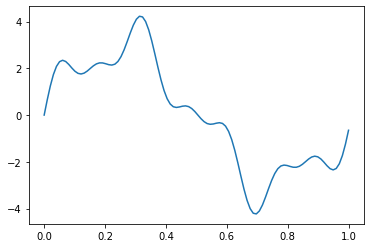

In [21]:
x_ift = IFT(X_k)

# re-engineering the x_grid

N = len(x_ift)
t = np.linspace(0,1,N)

plt.plot(t, x_ift)

# Bringing old program to get the argument x_k for function IFT, s.t. it can be verified instanteneously


<class 'numpy.ndarray'> <class 'numpy.ndarray'> (100,) (100, 1)
(100, 100)
(100,)
The dimension of multiplication bet k and n:  (100, 100)
The dimension of transformed function:  (100,)


<StemContainer object of 3 artists>

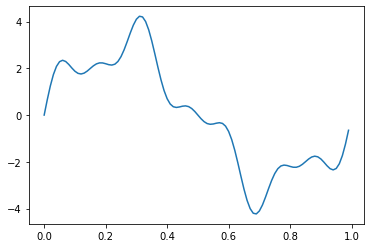

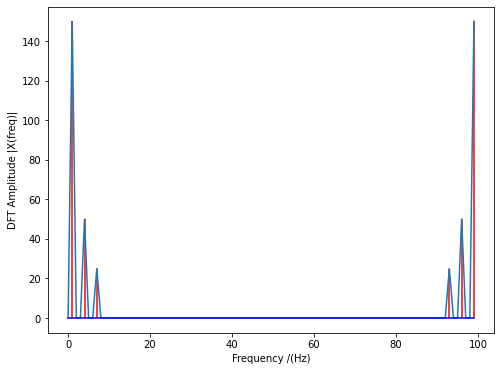

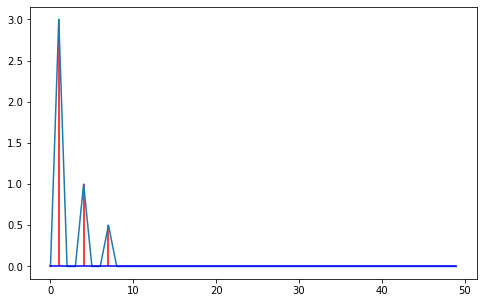

In [4]:

# Writing fucntion for the Discrete F.T. of 1D real valued signal (fucntion)

import numpy as np
import matplotlib.pyplot as plt

def DFT(x_n):
    
    N = len(x_n)       # number of samples 
    n = np.arange(N)   # samples states of the transformed w.f.
    k = n.reshape(N,1)   # the frequency k-grid from [0 to N-1] 
    
    # the multiplication of (N,) and (N,1) would give a (N,N) matrix 
    # basically every element individually interacts with whole (N,1) array
    # such that N elements of (N,) operation results into (N,N) mat    
    
    e = np.exp(-2j * np.pi * k * n / N) 
    print("The dimension of multiplication bet k and n: ",e.shape)
    
    '''The essence of this interaction is, every n being the sample 
    state is able to interact with k, the freq grid and hence, 
    it is like loop operation'''
    
    X_k = np.dot(e, x_n)
    print("The dimension of transformed function: ", X_k.shape)
    
    return X_k

def sin_wave(freq, amplitude, phase, time_grid):
    
    omega = 2*np.pi*freq
    y = amplitude*np.sin(omega*time_grid + phase)
    
    return y

# sampling rate 
sr = 100
s = 1.0/sr
t = np.arange(0,1,s)

freq_mu_1 = 1
amp_1 = 3
phase_1 = 0
wave_1 = sin_wave(freq_mu_1, amp_1, phase_1, t)

freq_mu_2 = 4
amp_2 = 1
phase_2 = 0
wave_2 = sin_wave(freq_mu_2, amp_2, phase_2, t)

freq_mu_3 = 7
amp_3 = 0.5
phase_3 = 0
wave_3 = sin_wave(freq_mu_3, amp_3, phase_3, t)

final_wave = wave_1 + wave_2 + wave_3
plt.plot(t, final_wave)



# interesting operation between array of dim (N,) and (N,1)
N = len(final_wave)
n = np.arange(N)
k = n.reshape(N,1)
m = n*k

print(type(n), type(k), n.shape, k.shape )
print(m.shape)
print((np.dot(m, n)).shape)
'''
As we can see, the inner product of (N,N) matrix with (N,) array gives
(N,) array
'''

# fourier transformed values
X_k = DFT(final_wave)

# Constructing frequency grid

N = len(X_k)
n = np.arange(N)     

# sr gave the sampling rate
T = N/sr
freq = n/T

plt.figure(figsize = (8,6))
plt.stem(freq, abs(X_k), "r", markerfmt = "", basefmt = "-b")
plt.xlabel("Frequency /(Hz)")
plt.ylabel("DFT Amplitude |X(freq)|")

'''Note that the output of the DFT is symmetric at half of the sampling rate. this half of the sampling rate is called the Nyquist frequency or
the folding frequency. It is named after the electrical engineer Harry Nyquist. He and Claude Shannon
formulated the Nyquist–Shannon sampling theorem, which states that a signal sampled at a rate can be
fully reconstructed if it contains only frequency components below half that sampling frequency; thus,
the highest frequency output from the DFT is half the sampling rate.'''

n_oneside = N/2
n_oneside = int(n_oneside)

# getting one side frequency

f_oneside = freq[ :n_oneside]

# normalize the amplitude
Xk_oneside = X_k[:n_oneside] / n_oneside

plt.figure(figsize = (8,5))
plt.stem(f_oneside, abs(Xk_oneside), "r",
         markerfmt = "", basefmt = "-b")

